I am using the San Farancisco building permits dataset here. My goal is to analyse and impute the missing values appropriately. 

In [197]:
#Import required libraries
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [198]:
#read from the dataset
sf_building_permits = pd.read_csv("/Users/arsheenkhatib/Desktop/datasets/Building_Permits.csv", error_bad_lines=False)

In [199]:
#view the dataset
pd.set_option("display.max_columns", 50)
sf_building_permits

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,NaN,11/09/2015,NaN,6.0,NaN,NaN,NaN,11/03/2016,4000.00,4000.00,tourist hotel/motel,143.0,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,NaN,08/03/2017,NaN,7.0,NaN,NaN,NaN,12/03/2017,1.00,500.00,tourist hotel/motel,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN,NaN,20000.00,NaN,retail sales,39.0,retail sales,39.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,NaN,2.0,2.0,NaN,NaN,07/13/2018,2000.00,2000.00,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,NaN,11/20/2017,NaN,3.0,NaN,NaN,NaN,12/01/2018,100000.00,100000.00,retail sales,NaN,NaN,NaN,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,NaN,NaN,evac maps,issued,07/06/2017,06/14/2017,07/06/2017,NaN,07/06/2017,NaN,5.0,5.0,NaN,Y,07/01/2018,4000.00,4000.00,apartments,326.0,apartments,326.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,0.0,NaN,re-roofing,complete,07/12/2017,06/30/2017,06/30/2017,07/12/2017,06/30/2017,NaN,3.0,3.0,NaN,NaN,06/25/2018,12000.00,12000.00,apartments,5.0,apartments,5.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,NaN,NaN,streetspace,issued,06/30/2017,06/30/2017,06/30/2017,NaN,06/30/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,NaN,NaN,street space permit,issued,07/05/2017,07/05/2017,07/05/2017,NaN,07/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.7723934985025

In [134]:
#frequency of missing values in each columns
percent_null = sf_building_permits.isnull().sum()
(percent_null*100)/len(sf_building_permits)

Permit Number                              0.000000
Permit Type                                0.000000
Permit Type Definition                     0.000000
Permit Creation Date                       0.000000
Block                                      0.000000
Lot                                        0.000000
Street Number                              0.000000
Street Number Suffix                      98.885872
Street Name                                0.000000
Street Suffix                              1.391654
Unit                                      85.178984
Unit Suffix                               99.014077
Description                                0.145802
Current Status                             0.000000
Current Status Date                        0.000000
Filed Date                                 0.000000
Issued Date                                7.511312
Completed Date                            51.135747
First Construction Document Date           7.514329
Structural N

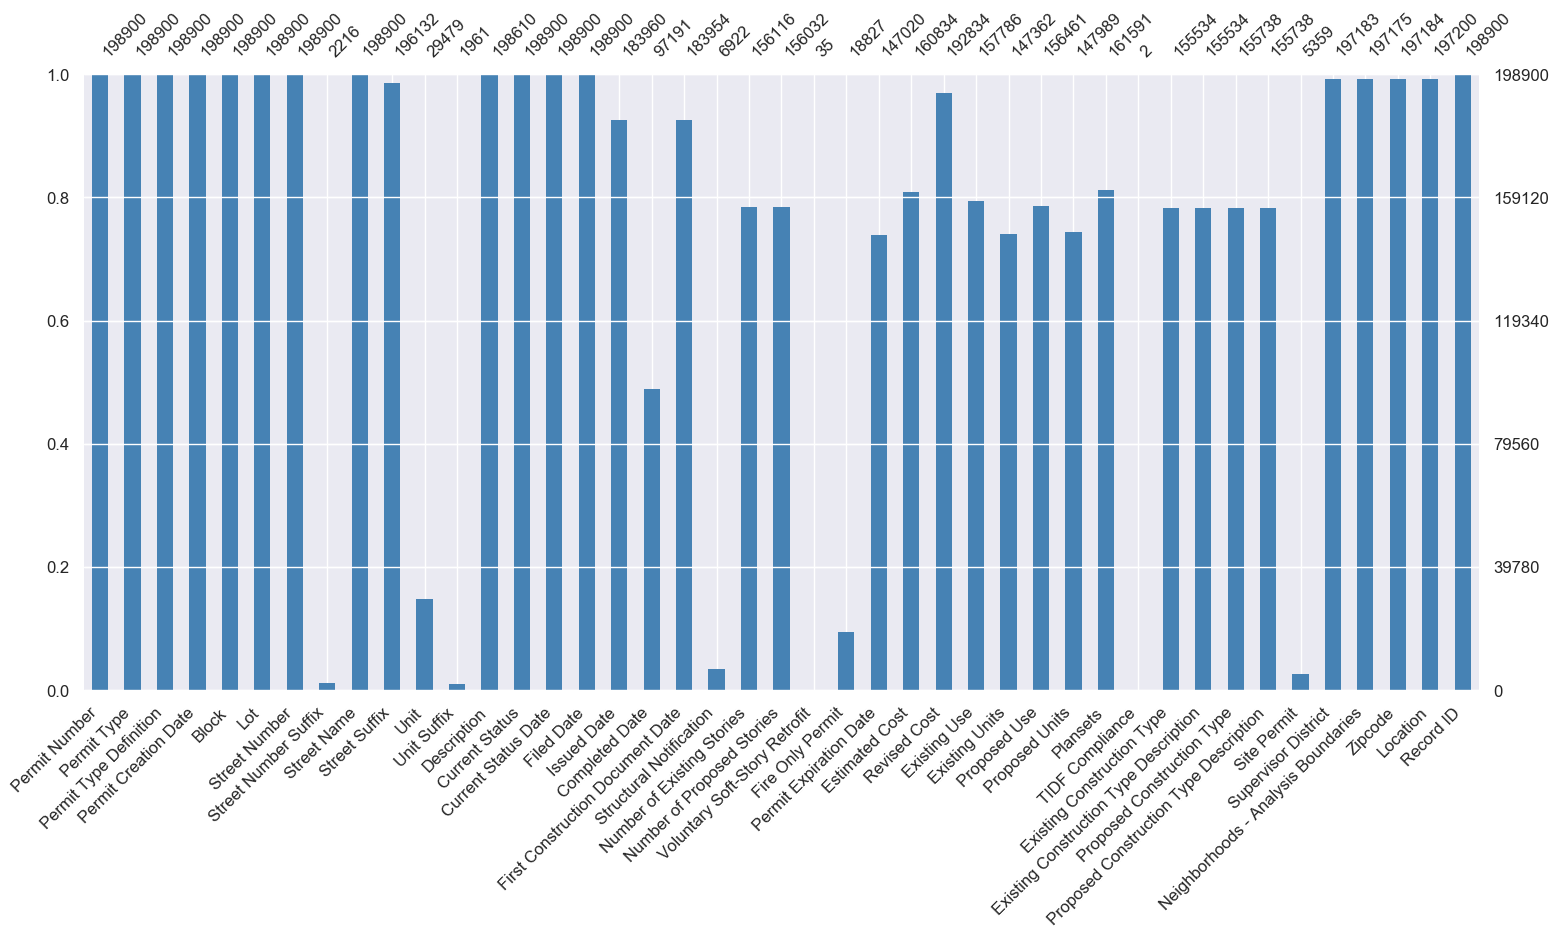

In [135]:
#visualize the missing data
#here we can spot the columns with the missing values easily
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(sf_building_permits, figsize=(18, 8), fontsize=12, color='steelblue')
plt.show()

In [136]:
#use pandas profile to obtain an extensively detailed profile of the dataset
import pandas_profiling
pandas_profiling.ProfileReport(sf_building_permits)

Number of variables,43
Number of observations,198900
Total Missing (%),24.6%
Total size in memory,65.3 MiB
Average record size in memory,344.0 B
Numeric,11
Categorical,28
Boolean,0
Date,0
Text (Unique),0
Rejected,4


In [137]:
#columns which are highly correlated and which should be dropped include: 
#Proposed Stories, Proposed Construction type, Proposed units, revised cost
#however, these can be used to predict each other's values before dropping one of them
#so we will not be dropping them right now
#drop columns with missing data >70% and values which are highly correlated with other columns
#If they have that much missing data, then they probably have no significant statistical value
sf_building_permits = sf_building_permits.drop(['Street Number Suffix','Unit','Unit Suffix','Structural Notification',
                                               'Voluntary Soft-Story Retrofit','Fire Only Permit',
                                                'TIDF Compliance','Site Permit','Proposed Construction Type',
                                               'Proposed Units','Number of Proposed Stories',
                                               'Revised Cost','Proposed Construction Type Description',
                                               'Existing Construction Type','Proposed Use'], axis =1)

In [138]:
#Number of distinct values under each column in the dataframe
sf_building_permits.T.apply(lambda x: x.nunique(), axis=1)

Permit Number                             181495
Permit Type                                    8
Permit Type Definition                         8
Permit Creation Date                        1291
Block                                       4896
Lot                                         1055
Street Number                               5099
Street Name                                 1704
Street Suffix                                 21
Description                               134272
Current Status                                14
Current Status Date                         1307
Filed Date                                  1288
Issued Date                                 1289
Completed Date                              1300
First Construction Document Date            1288
Number of Existing Stories                    64
Permit Expiration Date                      2232
Estimated Cost                             11395
Existing Use                                  93
Existing Units      

In [139]:
#List the data types of each of the columns
sf_building_permits.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Name                                object
Street Suffix                              object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Number of Existing Stories                float64
Permit Expiration Date                     object
Estimated Cost                            float64
Existing Use                               object


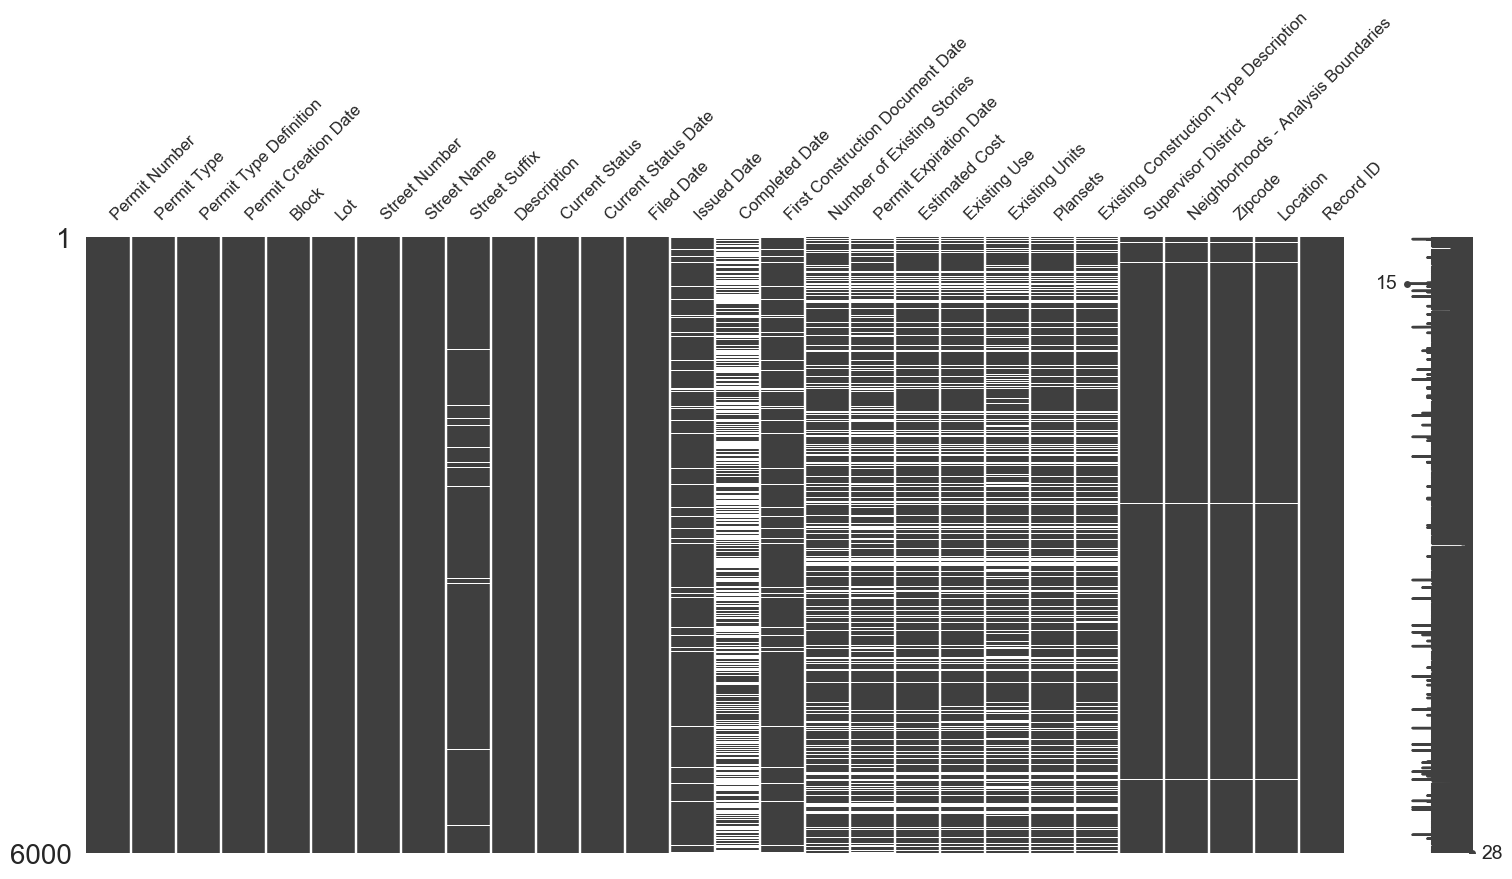

In [140]:
#visualize the data in the order of no. of missing values:
msno.matrix(sf_building_permits.sample(6000), figsize=(18, 8), fontsize=12)
plt.show()

In [141]:
#we see that completed date has  the highest no. of missing values
#We can check if the completed date has randomly missing values by comparing it to the current status of the building
sf_building_permits[['Current Status','Completed Date']]

,Current Status,Completed Date
0,expired,NaN
1,issued,NaN
2,withdrawn,NaN
3,complete,07/24/2017
4,issued,NaN
5,issued,NaN
6,complete,07/12/2017
7,issued,NaN
8,issued,NaN
9,issued,NaN


In [142]:
#we see that most of the values correspond to the 'complete' label in the "current data" dataset
#making sure that there is no missing data other than that which we already expect
list1=[]
status_missing={}
status_not_missing={}
for index in range(len(sf_building_permits)):
    
    
    if (type(sf_building_permits['Completed Date'][index]) == float):
        list1.append(index)
        
        if not sf_building_permits['Current Status'][index] in status_missing:
            status_missing[sf_building_permits['Current Status'][index]] = 0
        status_missing[sf_building_permits['Current Status'][index]] += 1
        
    if not (type(sf_building_permits['Completed Date'][index]) == float):
        
        if not sf_building_permits['Current Status'][index] in status_not_missing:
            status_not_missing[sf_building_permits['Current Status'][index]] = 0     
        status_not_missing[sf_building_permits['Current Status'][index]] += 1
        

print("\nNot Missing for current status: {}".format(status_not_missing))
print("\nMissing for current status: {}".format(status_missing))


Not Missing for current status: {'complete': 97077, 'issued': 53, 'reinstated': 36, 'expired': 7, 'approved': 5, 'revoked': 4, 'cancelled': 5, 'suspend': 3, 'incomplete': 1}

Missing for current status: {'expired': 1363, 'issued': 83506, 'withdrawn': 1754, 'filed': 12043, 'approved': 728, 'reinstated': 527, 'cancelled': 1531, 'appeal': 2, 'suspend': 190, 'revoked': 46, 'plancheck': 16, 'disapproved': 2, 'incomplete': 1}


In [143]:
current_status_list =['withdrawn', 'filed', 'approved', 'cancelled', 'appeal', 'reinstated', 
                      'plancheck', 'issued', 'complete', 'suspend', 'disapproved', 
                      'incomplete', 'expired','revoked']
vis_comp_date = {}
for i in current_status_list:
    sum_nan = 0
    sum_total = 0
    list2 = []
    for j in range(len(sf_building_permits["Current Status"])):
        if sf_building_permits["Current Status"][j] == i:
            if type(sf_building_permits['Completed Date'][j])==float:
                sum_nan +=1
            else:
                sum_total +=1
    
    vis_comp_date[i]=((sum_nan*100)/(sum_total+sum_nan))
    print("\nMissing data for   {}  in  'Completed Date'  is:    {} out of {}   {}".format(i,sum_nan,(sum_total+sum_nan),((sum_nan*100)/(sum_total+sum_nan))))
print("\n",vis_comp_date)


Missing data for   withdrawn  in  'Completed Date'  is:    1754 out of 1754   100.0

Missing data for   filed  in  'Completed Date'  is:    12043 out of 12043   100.0

Missing data for   approved  in  'Completed Date'  is:    728 out of 733   99.31787175989086

Missing data for   cancelled  in  'Completed Date'  is:    1531 out of 1536   99.67447916666667

Missing data for   appeal  in  'Completed Date'  is:    2 out of 2   100.0

Missing data for   reinstated  in  'Completed Date'  is:    527 out of 563   93.6056838365897

Missing data for   plancheck  in  'Completed Date'  is:    16 out of 16   100.0

Missing data for   issued  in  'Completed Date'  is:    83506 out of 83559   99.93657176366399

Missing data for   complete  in  'Completed Date'  is:    0 out of 97077   0.0

Missing data for   suspend  in  'Completed Date'  is:    190 out of 193   98.44559585492227

Missing data for   disapproved  in  'Completed Date'  is:    2 out of 2   100.0

Missing data for   incomplete  in  'Co

In [144]:
'''import numpy as np
plt.bar(vis_comp_date.keys(),vis_comp_date.values())
index = np.arange(len(vis_comp_date))
plt.xticks(index, vis_comp_date.keys(), fontsize=8, rotation=30)
plt.ylim((49, 100))
plt.xlabel('Current Status', fontsize=8)
plt.ylabel('Percentage of values present', fontsize=8)
plt.title('Percentage of values present in "Completed Date"')
plt.show()'''

'import numpy as np\nplt.bar(vis_comp_date.keys(),vis_comp_date.values())\nindex = np.arange(len(vis_comp_date))\nplt.xticks(index, vis_comp_date.keys(), fontsize=8, rotation=30)\nplt.ylim((49, 100))\nplt.xlabel(\'Current Status\', fontsize=8)\nplt.ylabel(\'Percentage of values present\', fontsize=8)\nplt.title(\'Percentage of values present in "Completed Date"\')\nplt.show()'

In [145]:
#from the above graph we see that "issued" has 50% missing values and complete has 0% missing values
#the rest have atleast 90% missing values.
#by analysing this data we notice that only thr 'complete' label always has data in the completed date column
#the rest may be incorrectly labelled.
#therefore we will label the missing values as "Not completed"(NMAR) and the incorrectly labelled values as "MCAR"

randomly_missing = 0
index_wrongly_labelled =[]
for index in range(len(sf_building_permits)):
    if not (type(sf_building_permits['Completed Date'][index]) == float):
        if not (sf_building_permits['Current Status'][index] == 'complete'):
            print(index,sf_building_permits['Current Status'][index],sf_building_permits['Completed Date'][index])
            index_wrongly_labelled.append(index)
            randomly_missing +=1
            

1088 issued 01/08/2013
1089 issued 01/08/2013
2325 reinstated 01/30/2013
2483 reinstated 02/20/2013
2763 expired 02/14/2013
3130 approved 10/03/2013
3423 issued 02/05/2013
4437 reinstated 04/10/2013
4568 issued 02/15/2013
4570 issued 02/15/2013
4571 issued 02/15/2013
5967 reinstated 03/12/2013
6855 issued 06/25/2013
7021 issued 03/15/2013
8084 issued 03/28/2013
12176 issued 05/10/2013
12704 revoked 05/31/2013
12860 issued 05/16/2013
13461 issued 05/22/2013
13475 issued 05/22/2013
13476 issued 05/22/2013
13548 reinstated 06/19/2013
14261 issued 04/01/2014
14358 issued 06/03/2013
14359 issued 06/03/2013
15047 expired 06/23/2014
15466 issued 06/12/2013
15467 issued 06/12/2013
20933 reinstated 05/13/2015
21224 issued 08/09/2013
21475 cancelled 09/15/2013
23503 revoked 07/11/2014
23572 issued 09/03/2013
24565 cancelled 10/30/2013
26960 issued 10/04/2013
27473 issued 10/10/2013
30069 cancelled 06/24/2014
30070 cancelled 06/24/2014
33002 issued 12/05/2013
33007 issued 12/05/2013
34059 reinsta

In [146]:
sf_building_permits['Completed Date'][list1]="Incomplete"      
#sf_building_permits['Completed Date'][index_wrongly_labelled]="Wrongly Labelled"

## Mark as wrongly label or NaN?
try NaN for now

In [147]:
sf_building_permits['Completed Date'][index_wrongly_labelled]=float('nan')

In [148]:
sf_building_permits['Completed Date'][183159]

nan

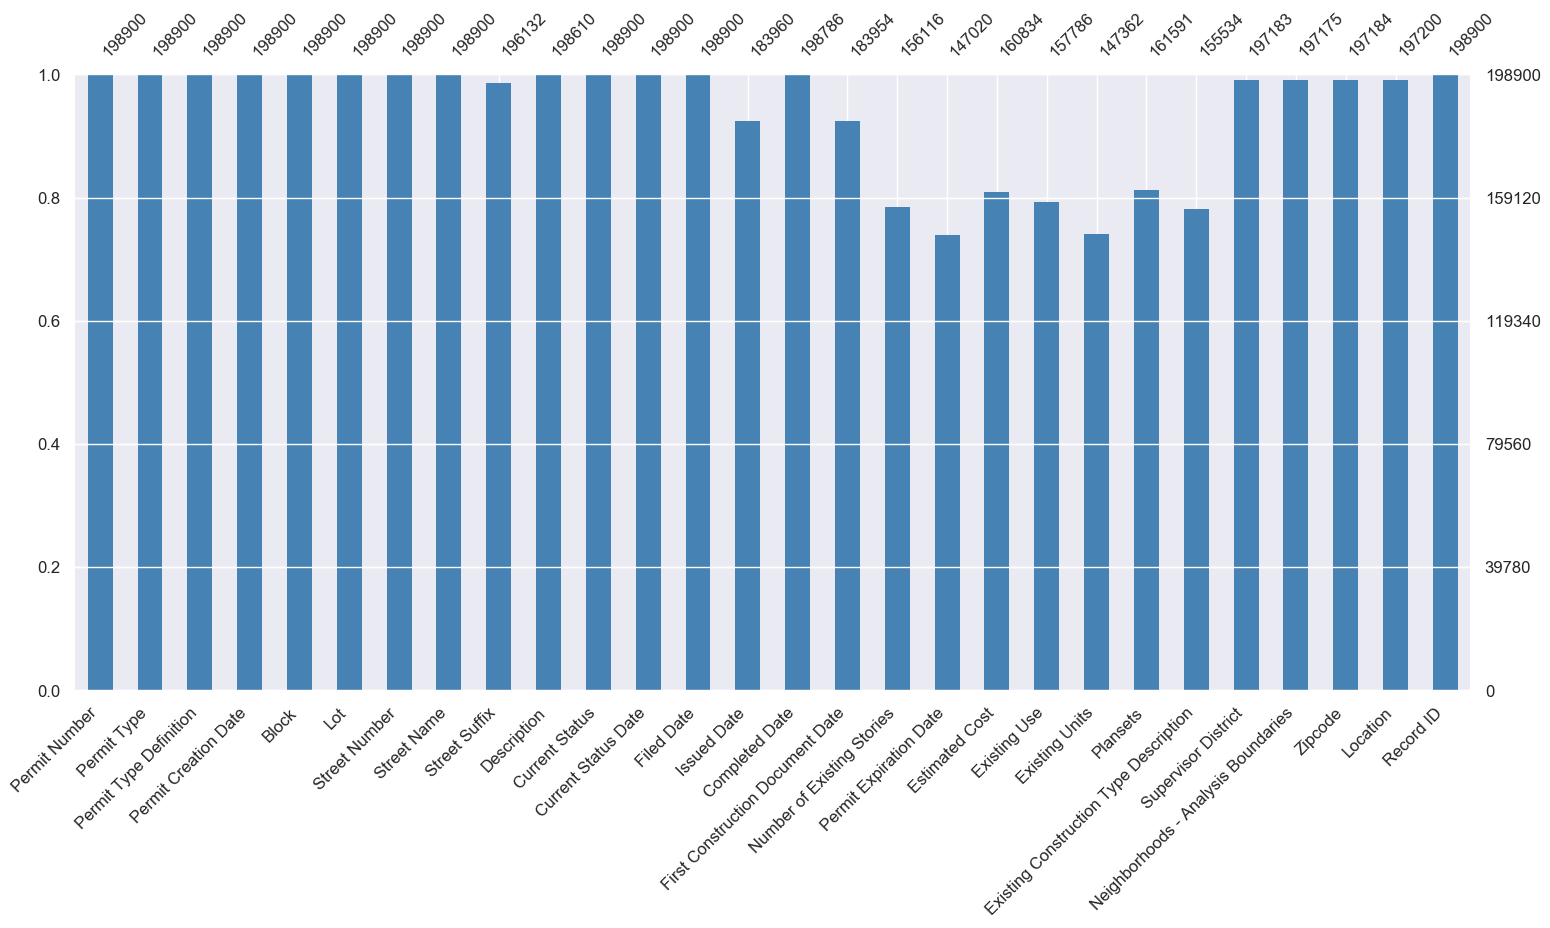

In [149]:
#visualize the missing data
#here we can spot the columns with the missing values easily
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(sf_building_permits, figsize=(18, 8), fontsize=12, color='steelblue')
plt.show()

In [150]:
#by looking at the percentage of missing values we see that the "Issued Date" and "First Construction Document Date"
#have the same no. of missing values. Let us assume that they are correlated based on this factor and view them
#in relation to the current status of the building
#We can't actually check the correlation between two features without converting them to numeric first.
sf_building_permits[["Current Status","Issued Date","First Construction Document Date"]]

,Current Status,Issued Date,First Construction Document Date
0,expired,11/09/2015,11/09/2015
1,issued,08/03/2017,08/03/2017
2,withdrawn,NaN,NaN
3,complete,07/18/2017,07/18/2017
4,issued,12/01/2017,11/20/2017
5,issued,07/06/2017,07/06/2017
6,complete,06/30/2017,06/30/2017
7,issued,06/30/2017,06/30/2017
8,issued,07/05/2017,07/05/2017
9,issued,07/06/2017,07/06/2017


In [151]:
#Issued Date
list1=[]
status_missing={}
status_not_missing={}
for index in range(len(sf_building_permits)):
    
    
    if (type(sf_building_permits['Issued Date'][index]) == float):
        list1.append(index)
        
        if not sf_building_permits['Current Status'][index] in status_missing:
            status_missing[sf_building_permits['Current Status'][index]] = 0
        status_missing[sf_building_permits['Current Status'][index]] += 1
        
    if not (type(sf_building_permits['Issued Date'][index]) == float):
        
        if not sf_building_permits['Current Status'][index] in status_not_missing:
            status_not_missing[sf_building_permits['Current Status'][index]] = 0     
        status_not_missing[sf_building_permits['Current Status'][index]] += 1
        

print("\nNot Missing for current status: {}".format(status_not_missing))
print("\nMissing for current status: {}".format(status_missing))


Not Missing for current status: {'expired': 1370, 'issued': 83559, 'complete': 97059, 'reinstated': 526, 'cancelled': 1197, 'suspend': 189, 'approved': 8, 'revoked': 50, 'withdrawn': 1, 'incomplete': 1}

Missing for current status: {'withdrawn': 1753, 'filed': 12043, 'approved': 725, 'cancelled': 339, 'appeal': 2, 'reinstated': 37, 'plancheck': 16, 'complete': 18, 'suspend': 4, 'disapproved': 2, 'incomplete': 1}


In [152]:
#"First Construction Document Date"
list1=[]
status_missing={}
status_not_missing={}
for index in range(len(sf_building_permits)):
    
    
    if (type(sf_building_permits["First Construction Document Date"][index]) == float):
        list1.append(index)
        
        if not sf_building_permits['Current Status'][index] in status_missing:
            status_missing[sf_building_permits['Current Status'][index]] = 0
        status_missing[sf_building_permits['Current Status'][index]] += 1
        
    if not (type(sf_building_permits["First Construction Document Date"][index]) == float):
        
        if not sf_building_permits['Current Status'][index] in status_not_missing:
            status_not_missing[sf_building_permits['Current Status'][index]] = 0     
        status_not_missing[sf_building_permits['Current Status'][index]] += 1
        

print("\nNot Missing for current status: {}".format(status_not_missing))
print("\nMissing for current status: {}".format(status_missing))


Not Missing for current status: {'expired': 1370, 'issued': 83550, 'complete': 97037, 'reinstated': 526, 'cancelled': 1197, 'approved': 17, 'suspend': 189, 'revoked': 50, 'filed': 16, 'withdrawn': 1, 'incomplete': 1}

Missing for current status: {'withdrawn': 1753, 'filed': 12027, 'approved': 716, 'cancelled': 339, 'appeal': 2, 'reinstated': 37, 'plancheck': 16, 'issued': 9, 'complete': 40, 'suspend': 4, 'disapproved': 2, 'incomplete': 1}


In [153]:
#find percentage of missing values:
#Issued Date

current_status_list =['withdrawn', 'filed', 'approved', 'cancelled', 'appeal', 
                      'reinstated', 'plancheck', 'complete', 'suspend', 
                      'disapproved', 'incomplete','issued']
vis_issue_date = {}
for i in current_status_list:
    sum_nan = 0
    sum_total = 0
    for j in range(len(sf_building_permits["Current Status"])):
        if sf_building_permits["Current Status"][j] == i:
            if type(sf_building_permits['Issued Date'][j])==float:
                sum_nan +=1
            else:
                sum_total +=1
    vis_issue_date[i]=((sum_nan*100)/(sum_total+sum_nan))
    print("\nMissing data for   {}  in  'Issued Date'  is:    {} out of {}   {}".format(i,sum_nan,(sum_total+sum_nan),((sum_nan*100)/(sum_total+sum_nan))))
print("\n",vis_issue_date)


Missing data for   withdrawn  in  'Issued Date'  is:    1753 out of 1754   99.94298745724059

Missing data for   filed  in  'Issued Date'  is:    12043 out of 12043   100.0

Missing data for   approved  in  'Issued Date'  is:    725 out of 733   98.90859481582538

Missing data for   cancelled  in  'Issued Date'  is:    339 out of 1536   22.0703125

Missing data for   appeal  in  'Issued Date'  is:    2 out of 2   100.0

Missing data for   reinstated  in  'Issued Date'  is:    37 out of 563   6.571936056838366

Missing data for   plancheck  in  'Issued Date'  is:    16 out of 16   100.0

Missing data for   complete  in  'Issued Date'  is:    18 out of 97077   0.01854198213789054

Missing data for   suspend  in  'Issued Date'  is:    4 out of 193   2.0725388601036268

Missing data for   disapproved  in  'Issued Date'  is:    2 out of 2   100.0

Missing data for   incomplete  in  'Issued Date'  is:    1 out of 2   50.0

Missing data for   issued  in  'Issued Date'  is:    0 out of 83559 

In [154]:
#find percentage of missing values:
#"First Construction Document Date"

current_status_list =['withdrawn', 'filed', 'approved', 'cancelled', 'appeal', 
                      'reinstated', 'plancheck', 'complete', 'suspend', 
                      'disapproved', 'incomplete','issued']
vis_issue_date = {}
for i in current_status_list:
    sum_nan = 0
    sum_total = 0
    for j in range(len(sf_building_permits["Current Status"])):
        if sf_building_permits["Current Status"][j] == i:
            if type(sf_building_permits["First Construction Document Date"][j])==float:
                sum_nan +=1
            else:
                sum_total +=1
    vis_issue_date[i]=((sum_nan*100)/(sum_total+sum_nan))
    print("\nMissing data for   {}  in  First Construction Document Date  is:    {} out of {}   {}".format(i,sum_nan,(sum_total+sum_nan),((sum_nan*100)/(sum_total+sum_nan))))
print("\n",vis_issue_date)


Missing data for   withdrawn  in  First Construction Document Date  is:    1753 out of 1754   99.94298745724059

Missing data for   filed  in  First Construction Document Date  is:    12027 out of 12043   99.8671427385203

Missing data for   approved  in  First Construction Document Date  is:    716 out of 733   97.68076398362892

Missing data for   cancelled  in  First Construction Document Date  is:    339 out of 1536   22.0703125

Missing data for   appeal  in  First Construction Document Date  is:    2 out of 2   100.0

Missing data for   reinstated  in  First Construction Document Date  is:    37 out of 563   6.571936056838366

Missing data for   plancheck  in  First Construction Document Date  is:    16 out of 16   100.0

Missing data for   complete  in  First Construction Document Date  is:    40 out of 97077   0.04120440475086787

Missing data for   suspend  in  First Construction Document Date  is:    4 out of 193   2.0725388601036268

Missing data for   disapproved  in  Firs

In [155]:
#we can consider the "statuses" which have missing values close to 100% and label them as missing.
#The rest we can try to impute/drop later

#missing_features = ['filed','withdrawn','plancheck','incomplete','appeal','disapproved','approved']
missing_indices_first = []
for i in range(len(sf_building_permits)):
    if sf_building_permits["Current Status"][i] in ['filed','withdrawn','plancheck','incomplete','appeal','disapproved','approved']:
        missing_indices_first.append(i)
        

In [156]:
#sf_building_permits["First Construction Document Date"][missing_indices_first] = "Missing Data"
#sf_building_permits["Issued Date"][missing_indices_first] = "Missing Data"

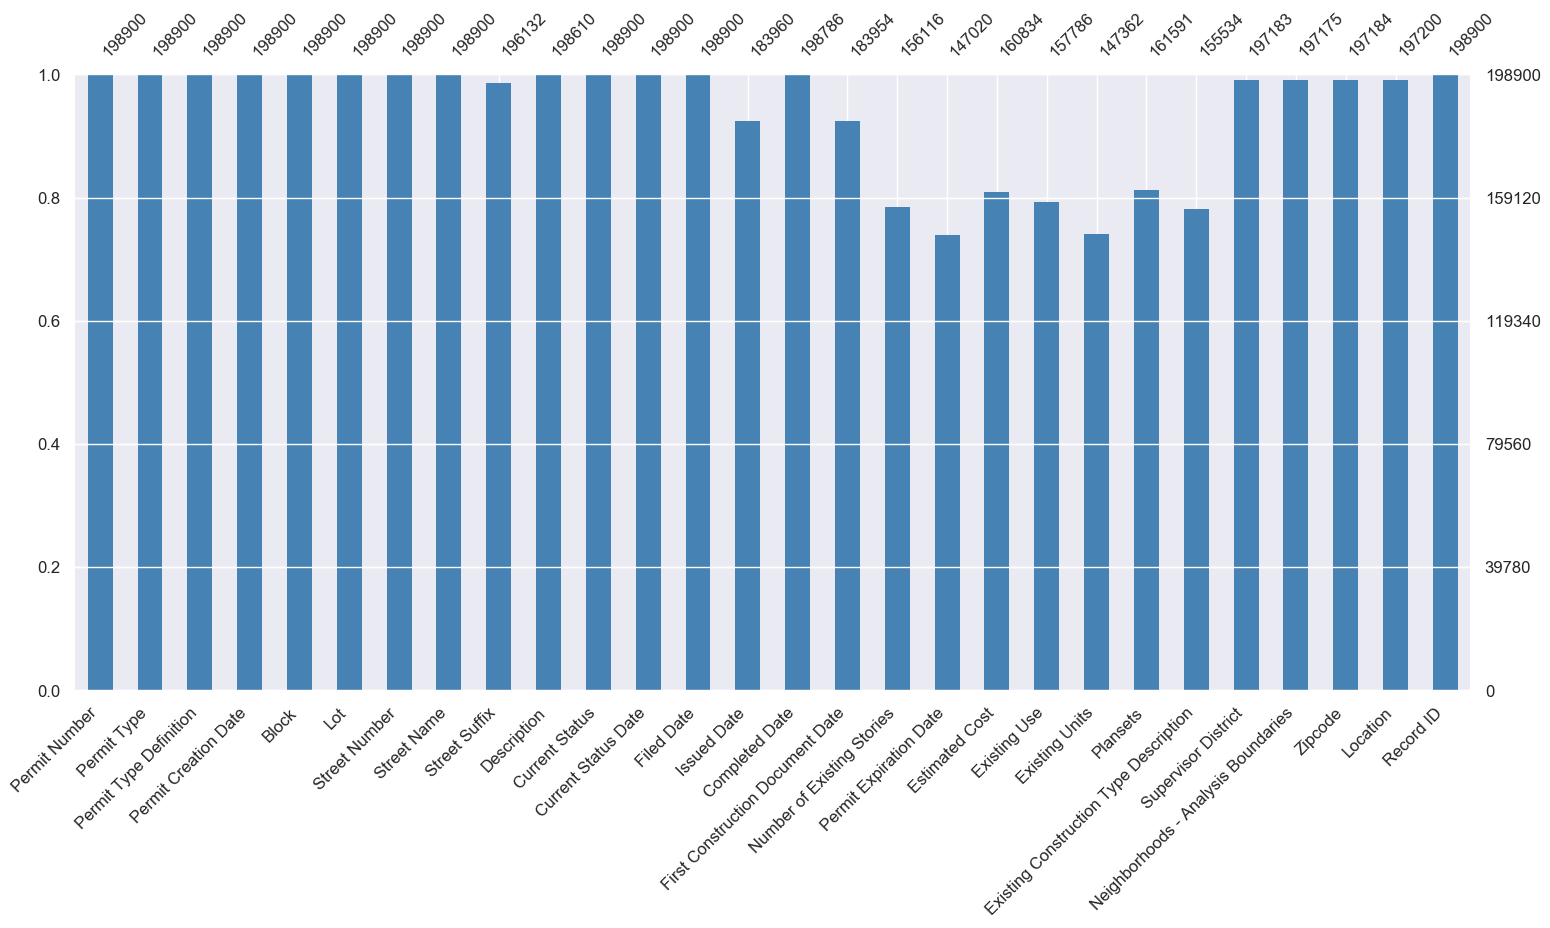

In [157]:
#visualize the missing data
#here we can spot the columns with the missing values easily
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(sf_building_permits, figsize=(18, 8), fontsize=12, color='steelblue')
plt.show()

In [158]:
'''#no. of existing stories
#since this data is already in its numeric form, we can easily impute the missing values
#first way to impute data
#If “most_frequent”, then replace missing using the most frequent value along the axis.
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values="NaN", strategy='most_frequent', axis=0)
X = imp.fit_transform(sf_building_permits[['Number of Existing Stories']])
X'''

'#no. of existing stories\n#since this data is already in its numeric form, we can easily impute the missing values\n#first way to impute data\n#If “most_frequent”, then replace missing using the most frequent value along the axis.\nfrom sklearn.preprocessing import Imputer\n\nimp = Imputer(missing_values="NaN", strategy=\'most_frequent\', axis=0)\nX = imp.fit_transform(sf_building_permits[[\'Number of Existing Stories\']])\nX'

In [159]:
#sf_building_permits[['Number of Existing Stories']]=pd.DataFrame(X, columns=['Number of Existing Stories'])

In [160]:
'''#visualize the missing data
#here we can spot the columns with the missing values easily
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(sf_building_permits, figsize=(18, 8), fontsize=12, color='steelblue')
plt.show()'''

"#visualize the missing data\n#here we can spot the columns with the missing values easily\nimport missingno as msno\nimport matplotlib.pyplot as plt\nmsno.bar(sf_building_permits, figsize=(18, 8), fontsize=12, color='steelblue')\nplt.show()"

In [161]:
#analyse the dataset
pd.set_option("display.max_columns", 50)
sf_building_permits

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Number of Existing Stories,Permit Expiration Date,Estimated Cost,Existing Use,Existing Units,Plansets,Existing Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,St,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,Incomplete,11/09/2015,6.0,11/03/2016,4000.00,tourist hotel/motel,143.0,2.0,constr type 3,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,St,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,Incomplete,08/03/2017,7.0,12/03/2017,1.00,tourist hotel/motel,NaN,2.0,constr type 3,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,Av,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,Incomplete,NaN,6.0,NaN,20000.00,retail sales,39.0,2.0,constr type 1,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,Av,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,07/24/2017,07/18/2017,2.0,07/13/2018,2000.00,1 family dwelling,1.0,2.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,St,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,Incomplete,11/20/2017,3.0,12/01/2018,100000.00,retail sales,NaN,2.0,constr type 3,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,Indiana,St,evac maps,issued,07/06/2017,06/14/2017,07/06/2017,Incomplete,07/06/2017,5.0,07/01/2018,4000.00,apartments,326.0,2.0,constr type 1,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,11th,Av,re-roofing,complete,07/12/2017,06/30/2017,06/30/2017,07/12/2017,06/30/2017,3.0,06/25/2018,12000.00,apartments,5.0,0.0,wood frame (5),5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,Revere,Av,streetspace,issued,06/30/2017,06/30/2017,06/30/2017,Incomplete,06/30/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,Fell,St,street space permit,issued,07/05/2017,07/05/2017,07/05/2017,Incomplete,07/05/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,Alpine,Tr,street space,issued,07/06/2017,07/06/2017,07/06/2017,Incomplete,07/06/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


In [162]:
#Number of distinct values under each column in the dataframe
sf_building_permits.T.apply(lambda x: x.nunique(), axis=1)

Permit Number                             181495
Permit Type                                    8
Permit Type Definition                         8
Permit Creation Date                        1291
Block                                       4896
Lot                                         1055
Street Number                               5099
Street Name                                 1704
Street Suffix                                 21
Description                               134272
Current Status                                14
Current Status Date                         1307
Filed Date                                  1288
Issued Date                                 1289
Completed Date                              1301
First Construction Document Date            1288
Number of Existing Stories                    64
Permit Expiration Date                      2232
Estimated Cost                             11395
Existing Use                                  93
Existing Units      

In [163]:
percent_null = sf_building_permits.isnull().sum()
(percent_null*100)/len(sf_building_permits)

Permit Number                              0.000000
Permit Type                                0.000000
Permit Type Definition                     0.000000
Permit Creation Date                       0.000000
Block                                      0.000000
Lot                                        0.000000
Street Number                              0.000000
Street Name                                0.000000
Street Suffix                              1.391654
Description                                0.145802
Current Status                             0.000000
Current Status Date                        0.000000
Filed Date                                 0.000000
Issued Date                                7.511312
Completed Date                             0.057315
First Construction Document Date           7.514329
Number of Existing Stories                21.510307
Permit Expiration Date                    26.083459
Estimated Cost                            19.138260
Existing Use

In [167]:
#let us view the columns which still have substantial amounts of missing data along with the current status
sf_building_permits[['Current Status','Number of Existing Stories','Permit Expiration Date',
                     'Estimated Cost','Existing Use','Existing Units','Plansets',
                     'Existing Construction Type Description','Issued Date','First Construction Document Date']]

,Current Status,Number of Existing Stories,Permit Expiration Date,Estimated Cost,Existing Use,Existing Units,Plansets,Existing Construction Type Description,Issued Date,First Construction Document Date
0,expired,6.0,11/03/2016,4000.00,tourist hotel/motel,143.0,2.0,constr type 3,11/09/2015,11/09/2015
1,issued,7.0,12/03/2017,1.00,tourist hotel/motel,NaN,2.0,constr type 3,08/03/2017,08/03/2017
2,withdrawn,6.0,NaN,20000.00,retail sales,39.0,2.0,constr type 1,NaN,NaN
3,complete,2.0,07/13/2018,2000.00,1 family dwelling,1.0,2.0,wood frame (5),07/18/2017,07/18/2017
4,issued,3.0,12/01/2018,100000.00,retail sales,NaN,2.0,constr type 3,12/01/2017,11/20/2017
5,issued,5.0,07/01/2018,4000.00,apartments,326.0,2.0,constr type 1,07/06/2017,07/06/2017
6,complete,3.0,06/25/2018,12000.00,apartments,5.0,0.0,wood frame (5),06/30/2017,06/30/2017
7,issued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06/30/2017,06/30/2017
8,issued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/05/2017,07/05/2017
9,issued,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07/06/2017,07/06/2017


In [172]:
ind_const = sf_building_permits.index[sf_building_permits['Existing Construction Type Description'] == 'constr type 3'].tolist()
ind_cst = sf_building_permits.index[sf_building_permits['Current Status'] == 'issued'].tolist()

In [176]:
fin = []
for i in ind_cst:
    if i in ind_const:
        fin.append(i)


In [183]:
print(sf_building_permits['Current Status'][763],sf_building_permits['Existing Units'][763])

issued 0.0


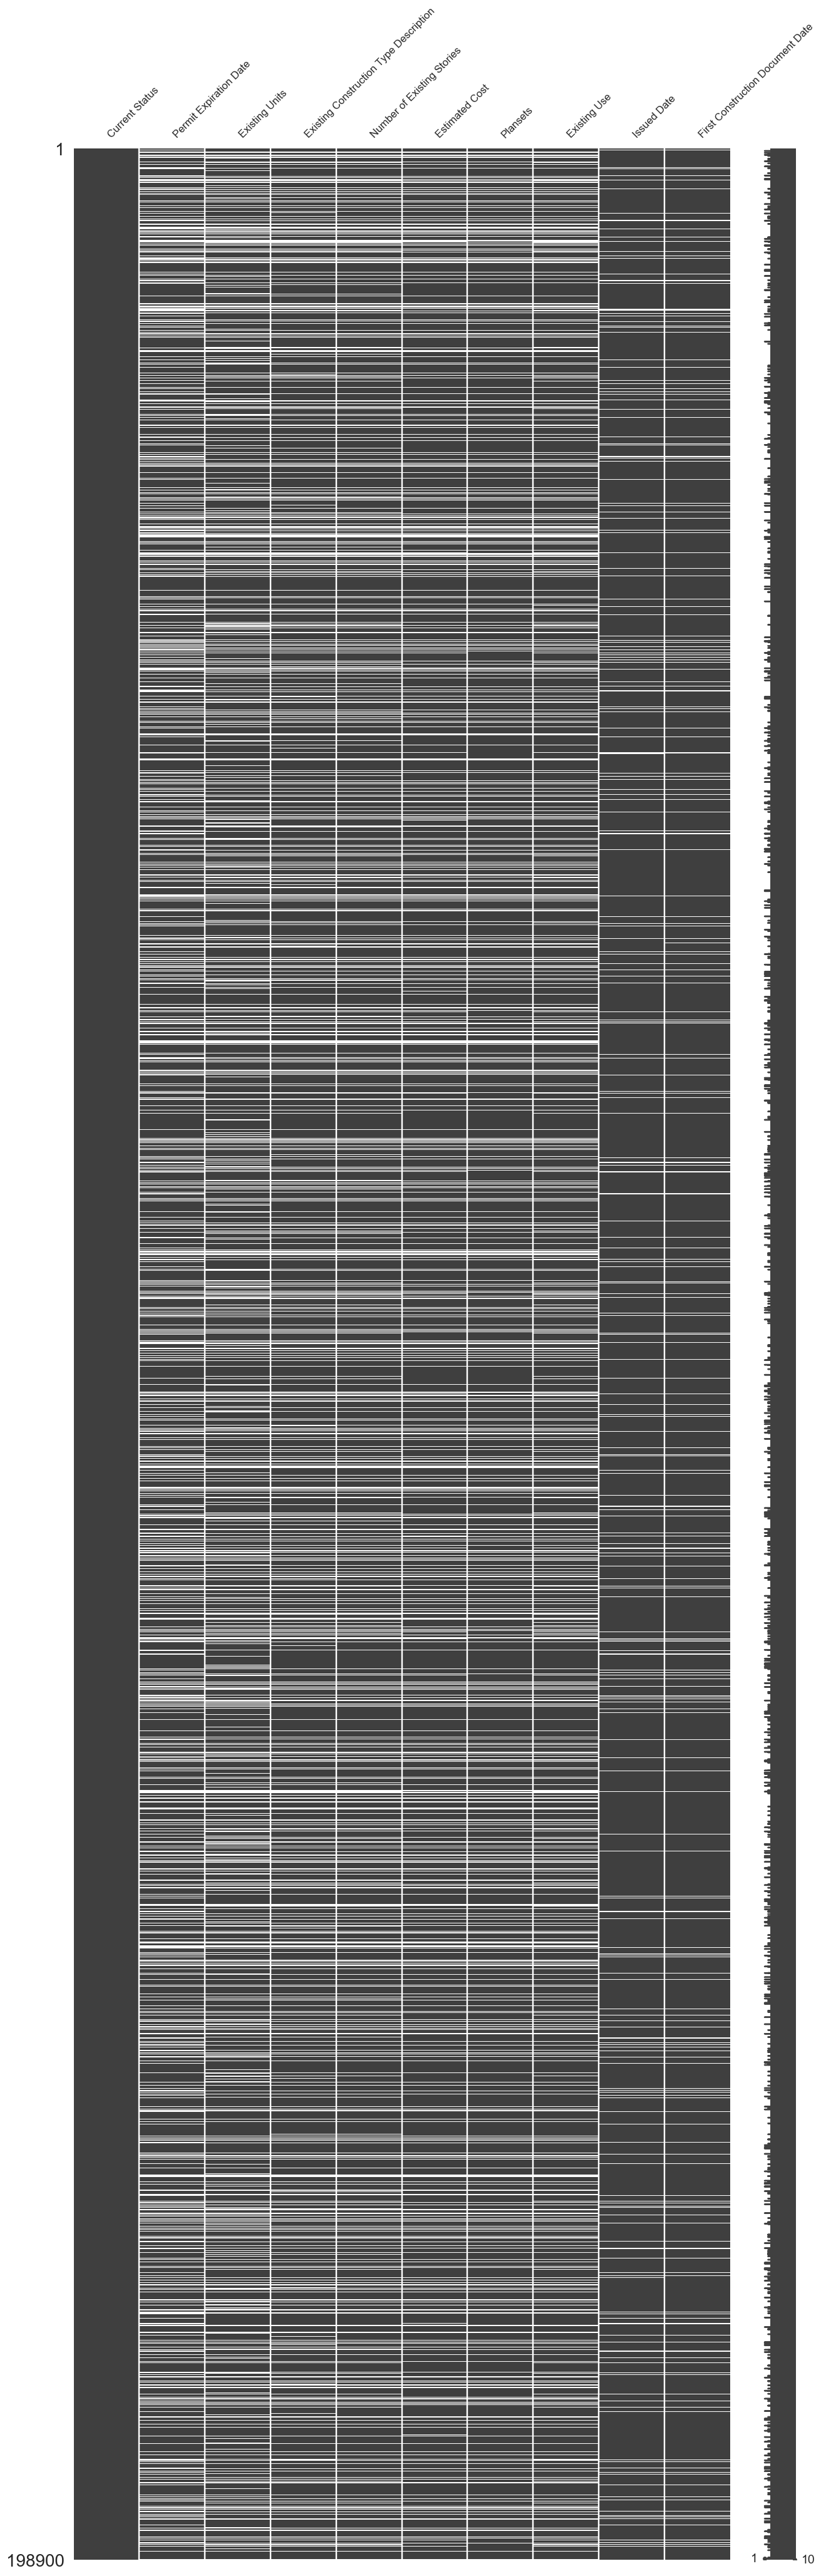

In [196]:
#visualize the data in the order of no. of missing values:
msno.matrix(sf_building_permits[['Current Status','Permit Expiration Date',
                                 'Existing Units','Existing Construction Type Description',
                     'Number of Existing Stories','Estimated Cost','Plansets','Existing Use',
                    'Issued Date','First Construction Document Date']].sample(198900), figsize=(15, 50), fontsize=12)
plt.show()